In [7]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt

from modules.adaptive.filters.rule_based import RuleBasedRecommender
from modules.adaptive.filters.collaborative import CollaborativeFiltering
from modules.adaptive.filters.content_based import ContentBasedFiltering

In [ ]:
# Initialize 
rule_based = RuleBasedRecommender(ratings_file="../storage/u.data", metadata_file="../storage/u.item")
collaborative_svd = CollaborativeFiltering(ratings_file="../storage/u.data", algorithm="SVD")
collaborative_user = CollaborativeFiltering(ratings_file="../storage/u.data", algorithm="user")
collaborative_item = CollaborativeFiltering(ratings_file="../storage/u.data", algorithm="item")
content_based = ContentBasedFiltering(ratings_file="../storage/u.data", metadata_file="../storage/u.item")

# Train 
collaborative_svd.fit()
collaborative_user.fit()
collaborative_item.fit()

top_movies = rule_based.recommend_top_movies(top_n=10)
top_movies_genre = rule_based.recommend_by_genre("Comedy", top_n=10)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:

svd_rmse = collaborative_svd.evaluate()
user_rmse = collaborative_user.evaluate()
item_rmse = collaborative_item.evaluate()

# Example evaluation CB 
user_id = 1
content_rmse = content_based.evaluate(sample_size=1000)
content_precision = content_based.precision_at_k(user_id, k=10)

results = {
    "Model": ["Rule-Based", "Collaborative (SVD)", "Collaborative (User-User)", "Collaborative (Item-Item)", "Content-Based"],
    "RMSE": [None, svd_rmse, user_rmse, item_rmse, content_rmse],
    "Precision@K": [None, None, None, None, content_precision],
}
results_df = pd.DataFrame(results)


RMSE: 0.9325
RMSE: 1.0194
RMSE: 1.0264


c:\Users\shrin\Downloads\moviemate\modules\adaptive\filters\content_based.py:135: RuntimeWarning: invalid value encountered in scalar divide
  similarity = np.dot(user_profile, item_vector) / (


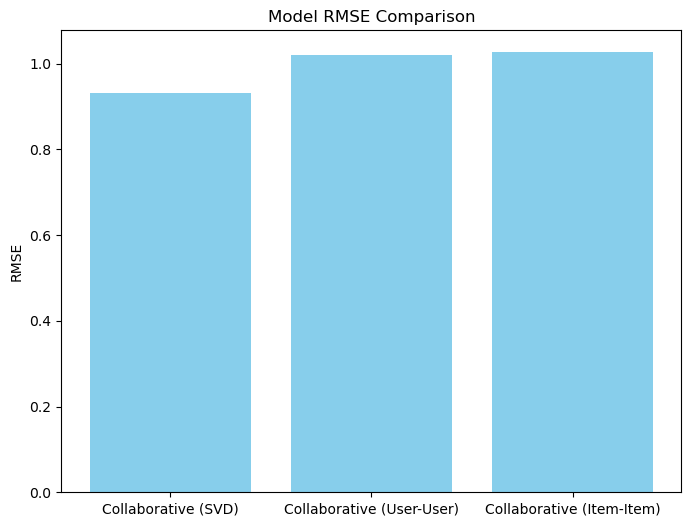

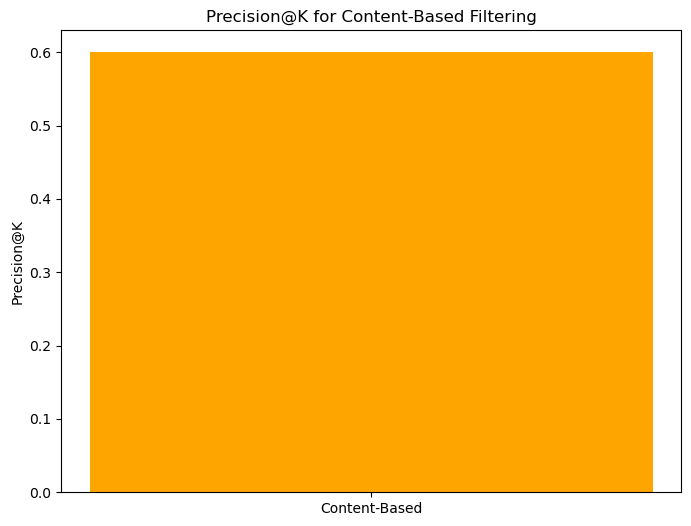

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(results_df["Model"][:-1], results_df["RMSE"][:-1], color='skyblue')
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(["Content-Based"], [content_precision], color='orange')
plt.title("Precision@K for Content-Based Filtering")
plt.ylabel("Precision@K")
plt.show()


## Task 2 & Model Performance Explanation

The rule-based model was simple and doesn't require advanced computaitons or user-item interaction matrices in its analysis, as it simply averages the ratings of movies/filters by genre to give recommendations. That being said, it lacks personalization and is very basic.

Within collaborative filtering, we analyzed SVD, user-user CF, and item-item CF. SVD had the lowest RMSE, while user-user CF and item-item CF each had higher RMSEs, suggesting that unlike SVD, the other models may have struggled from sparsity or simply could not capture the similarities in the best way. 

For content-based filtering, the RMSE was also fairly low with a competitive accurcay against collaborative filtering. Its precision@K was 0.6, suggesting that the top 10 recommendations match preferences per each user at least 60% of the time. 